## This notebook shows a sample of comfiguration model, can run directly from Colab environment

In [1]:
# mount GD
from google.colab import drive
drive.mount('/content/drive')

# your GD path to clone the repo
project_path="/content/drive/MyDrive/UofT_MEng/MIE1517/Project/FINDER_github/"

Mounted at /content/drive


In [ ]:
# Clone repo
%cd {project_path}

!git clone https://github.com/faraz2023/FINDER-pytorch.git

%cd FINDER-pytorch
%ls -a

In [2]:
# if already cloned
%cd {project_path}/FINDER-pytorch/
!pwd

/content/drive/MyDrive/UofT_MEng/MIE1517/Project/FINDER_github/FINDER-pytorch
/content/drive/MyDrive/UofT_MEng/MIE1517/Project/FINDER_github/FINDER-pytorch


In [ ]:
!pip install networkx==2.3

In [10]:
####  If not GD, run from local starts here ##############
project_path="/FINDER_CM"

In [11]:
# magic line for local jupyter notebooks
%matplotlib inline

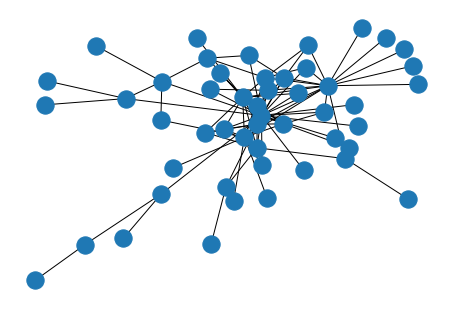

In [12]:
# Configuration model, code sample

from collections import Counter
import numpy as np
import pandas as pd
import networkx as nx

# read CM graph - HI-II-14
cm_g = nx.read_edgelist(f"{project_path}/FINDER-pytorch/data/real/HI-II-14.txt")

# get degree list P(k)
cm_degrees = np.array([val for (node, val) in cm_g.degree()])
# normalize P(k) to (0,1]
cm_degrees_mean = np.mean(cm_degrees)
cm_degrees = cm_degrees / np.max(cm_degrees)
cm_degrees, cm_degrees_ctr = np.unique(cm_degrees, return_counts=True)
# get frequency of each normalized P(k)
cm_degrees_freq = cm_degrees_ctr / np.sum(cm_degrees_ctr)


def cm_graph(cur_n, cm_degrees, cm_degrees_freq, cm_degrees_mean):
  # sample from nomarlized P(k) w.r.t frequency in orginal graph
  cm_trained_degrees = np.random.choice(a=cm_degrees, size=cur_n, p=cm_degrees_freq)

  # get expected max degree, while assuring the same mean degree to original graph
  cm_trained_max_degree = np.floor(cm_degrees_mean*cur_n / np.sum(cm_trained_degrees))

  # normalized to scales, round to int
  cm_trained_degrees = np.rint(cm_trained_degrees*cm_trained_max_degree).astype(int)

  # fine-tune the degrees to make sum degrees even (required by configuration_model)
  if(np.sum(cm_trained_degrees) % 2 == 1):
    cm_trained_degrees[0]+=1

  # cm_g, apply sequence of degrees
  cmg_g = nx.configuration_model(deg_sequence=cm_trained_degrees)

  # make it a connected graph, clean self-loops
  cmg_g = nx.Graph(cmg_g)
  cmg_g.remove_edges_from(nx.selfloop_edges(cmg_g))

  return cmg_g


g = cm_graph(50, cm_degrees, cm_degrees_freq, cm_degrees_mean)
nx.draw(g)
